# 03wk-010: 아이스크림(범주) / 회귀분석 – 추가해설

최규빈  
2023-09-21

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yMATKoY2e3Ltd85lyvT-Ht&si=8Ke2fNuWswEvFReG>

# 2. Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. Data

`-` 전주시의 기온 불러오기

In [5]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()

In [6]:
temp # 전주시의 기온, 100개

`-` 아래와 같은 모형을 가정하자.

$$\textup{초코 아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

$$\textup{바닐라 아이스크림 판매량} = 40 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

> 의미: (1) 온도가 1 올라가면 판매량이 2.5정도 오른다. (2) 동일
> 온도라면, 바닐라아이스크림은 초코아이스크림보다 20만큼 잘팔린다.

In [7]:
np.random.seed(43052)
choco = 20 + temp * 2.5 + np.random.randn(100)*3
vanilla = 40 + temp * 2.5 + np.random.randn(100)*3

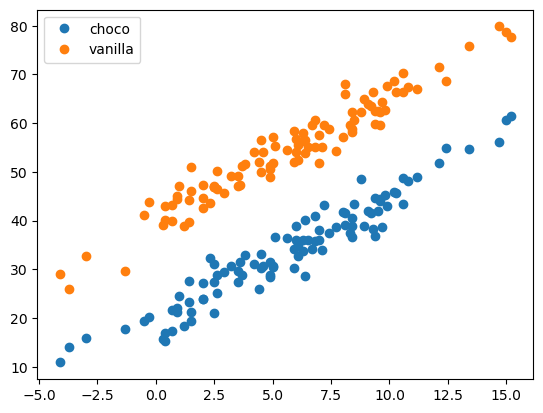

In [8]:
plt.plot(temp,choco,'o',label='choco')
plt.plot(temp,vanilla,'o',label='vanilla')
plt.legend()

`-` 주어진 자료: 우리는 아래를 관측했다고 생각하자.

In [9]:
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

# 5. 분석

## A. 데이터

In [11]:
X = df_train[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df_train[['sales']] # 종속변수, 반응변수, 타겟 

In [12]:
X = X.assign(type = [type == 'choco' for type in X.type])

## B. Predictor 생성

In [13]:
predictr = sklearn.linear_model.LinearRegression() 
predictr 

## C. 학습 (fit, learn)

In [14]:
predictr.fit(X,y)

## D. 예측 (predict)

In [15]:
yhat = predictr.predict(X)

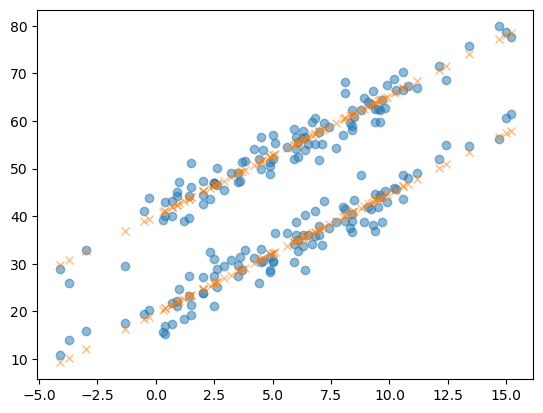

In [17]:
plt.plot(df_train.temp,df_train.sales,'o',alpha=0.5)
plt.plot(df_train.temp,yhat, 'x',alpha=0.5)

`-` 어떻게 맞춘거지?

$$\textup{아이스크림 판매량} = 40 + \textup{아이스크림종류} \times (-20) + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [18]:
predictr.coef_, predictr.intercept_

`-` 온도가 -2이고, type이 초코라면? 예측값은?

In [19]:
XX = pd.DataFrame({'temp':[-2.0],'type':[1]})
XX

In [21]:
predictr.predict(XX)

`-` 온도가 -2이고, type이 바닐라라면? 예측값은?

In [22]:
XX = pd.DataFrame({'temp':[-2.0],'type':[0]})
XX

In [23]:
predictr.predict(XX)

# 6. 데이터를 전처리하는 다른 방법

`-` 데이터

In [24]:
X = df_train[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df_train[['sales']] # 종속변수, 반응변수, 타겟 

`-` 원-핫 인코딩

In [25]:
X = pd.get_dummies(X)
X

`-` 이후의 과정은 동일

In [26]:
predictr = sklearn.linear_model.LinearRegression() 
predictr.fit(X,y)
yhat2 = predictr.predict(X)

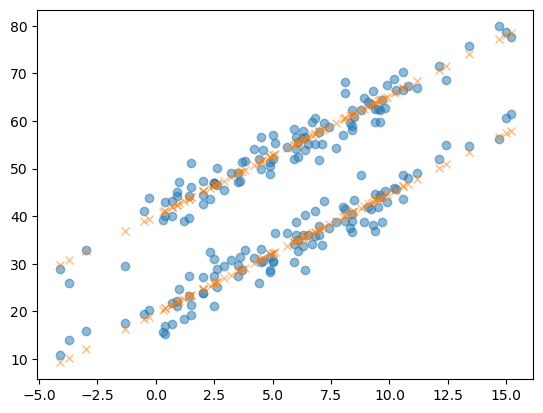

In [27]:
plt.plot(df_train.temp,df_train.sales,'o',alpha=0.5)
plt.plot(df_train.temp,yhat2, 'x',alpha=0.5)

`-` 모형을 어떻게 바라본걸까?

In [192]:
predictr.coef_

In [193]:
predictr.intercept_

$$\textup{아이스크림 판매량} = 30 + \textup{초코} \times (-10) + \textup{바닐라} \times 10 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

> **2023-10-24 추가해설**
>
> **오버피팅**: 엄밀하게 보면 초코를 의미하는 더미변수와 바닐라를
> 의미하는 더미변수 둘다 필요한것은 아님. 둘 중 하나는 제외해도 무방함.
> (R에서는 꼭 제외해야만 함)

# 7. 모형을 평가하는 방법

In [194]:
predictr.score(X,y)